source: 
https://github.com/ageron/handson-ml3/blob/main/09_unsupervised_learning.ipynb



In [2]:
import sklearn
from packaging import version

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [3]:
import matplotlib.pyplot as plt

plt.rc("font", size=14)
plt.rc("axes", labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc("xtick", labelsize=10)
plt.rc("ytick", labelsize=10)

In [8]:
from pathlib import Path

images_path = Path() / "images" 
images_path.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = images_path / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

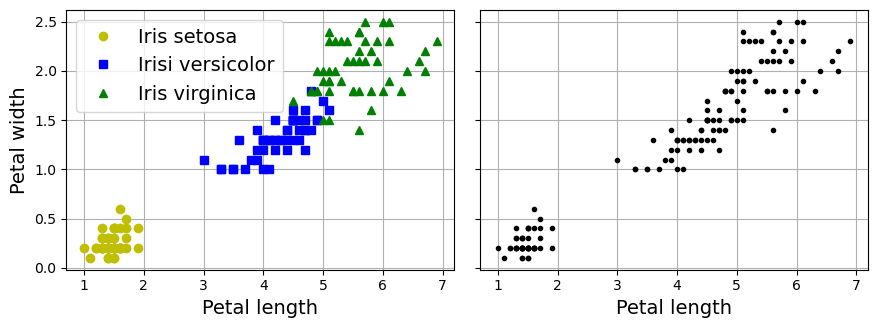

In [10]:
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target
data.target_names

plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y == 0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Irisi versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.grid()
plt.legend()

plt.subplot(122)
plt.scatter(X[: , 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length")
plt.tick_params(labelleft=False)
plt.gca().set_axisbelow(True)
plt.grid()

save_fig("classification vs clustering")
plt.show()

In [11]:
import numpy as np
from scipy import stats
from sklearn.mixture import GaussianMixture

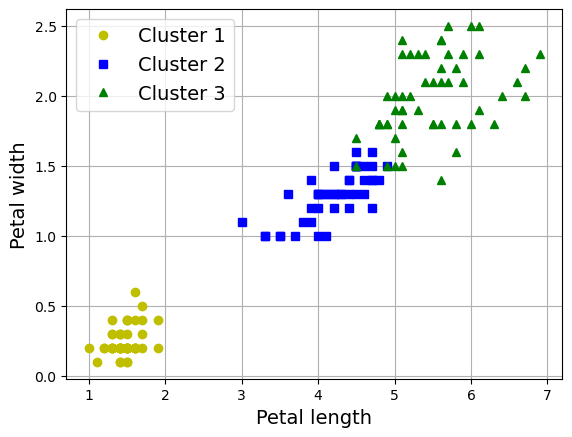

In [13]:
y_pred = GaussianMixture(
    n_components=3,
    random_state=42
).fit(X).predict(X)

mapping = {}
for class_id in np.unique(y):
    mode, _ = stats.mode(y_pred[y==class_id])
    mapping[mode] = class_id

y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

plt.plot(X[y_pred==0, 2], X[y_pred == 0, 3], "yo", label="Cluster 1")
plt.plot(X[y_pred==1, 2], X[y_pred == 1, 3], "bs", label="Cluster 2")
plt.plot(X[y_pred==2, 2], X[y_pred == 2, 3], "g^", label="Cluster 3")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.grid()
plt.show()

In [14]:
(y_pred == y).sum() / len(y_pred)

np.float64(0.9666666666666667)

In [15]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

blob_centers = np.array(
    [
        [0.2, 2.3], [-1.5, 2.3], [-2.8, 1.8],
        [-2.8, 2.8], [-2.8, 1.3]
    ]
)

blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std, random_state=7)

k = 5
kmeans = KMeans(
    n_clusters=k,
    n_init=10,
    random_state=42
)
y_pred = kmeans.fit_predict(X)

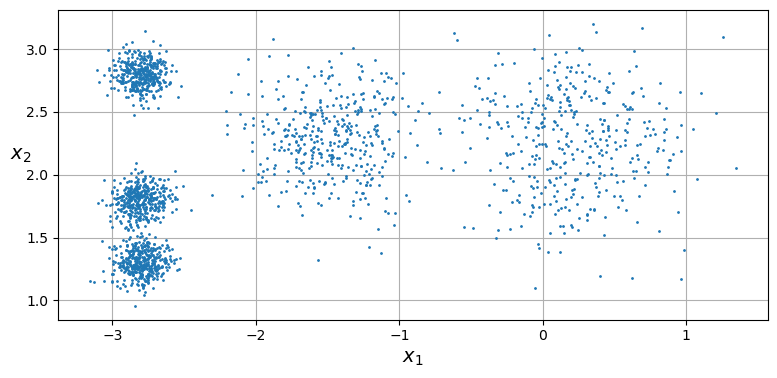

In [16]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)


plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.gca().set_axisbelow(True)
plt.grid()
save_fig("blobs_plot")
plt.show()

In [17]:
y_pred

array([0, 0, 4, ..., 3, 1, 0], shape=(2000,), dtype=int32)

In [18]:
y_pred is kmeans.labels_

True

In [19]:
kmeans.cluster_centers_

array([[-2.80214068,  1.55162671],
       [ 0.08703534,  2.58438091],
       [-1.46869323,  2.28214236],
       [-2.79290307,  2.79641063],
       [ 0.31332823,  1.96822352]])

In [23]:
kmeans.labels_

array([0, 0, 4, ..., 3, 1, 0], shape=(2000,), dtype=int32)

In [22]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])


kmeans.predict(X_new)

array([4, 4, 3, 3], dtype=int32)

In [ ]:
def plot_data(X):
    plt.plot(X[:, 0], X[:1])

In [1]:
tmp = ["a", "b", "c"]

tmp.split()

AttributeError: 'list' object has no attribute 'split'

In [2]:
set(tmp)

{'a', 'b', 'c'}

In [4]:
import numpy as np

In [5]:
a = np.array([0, 1, 0, 1, 0])
b = np.array([1, 0, 1, 0, 1])

a * b

array([0, 0, 0, 0, 0])

In [6]:
!pip list all

Package                   Version
------------------------- -----------
anyio                     4.10.0
appnope                   0.1.4
argon2-cffi               21.3.0
argon2-cffi-bindings      25.1.0
asttokens                 3.0.0
async-lru                 2.0.5
attrs                     25.4.0
babel                     2.17.0
beautifulsoup4            4.14.2
bleach                    6.3.0
Bottleneck                1.4.2
brotlicffi                1.1.0.0
certifi                   2025.11.12
cffi                      2.0.0
charset-normalizer        3.4.4
comm                      0.2.3
contourpy                 1.3.3
cycler                    0.11.0
debugpy                   1.8.16
decorator                 5.2.1
defusedxml                0.7.1
executing                 2.2.1
fastjsonschema            2.21.2
fonttools                 4.60.1
graphviz                  0.21
h11                       0.16.0
html5lib                  1.1
httpcore                  1.0.9
httpx            